# Worldwide Data Scientists  Salary Analysis

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv("data_scientists_salaries_from_reddit.csv")
df.head()

,date,title,location,salary,company_industry,education,prior_experience,bonus,stocks,total_comp,additional_benefits,tenure_length_period,tenure_length_period_units,survey_year
0,2020-12-28,Data Scientist,"Houston, TX, USA","140,000",Oil and Gas,Masters in Applied Statistics,2yrs of actuarial experience,NaN,15-30% bonus (no bonus this year of course du...,"140,000I'm about to accept a new job that will...",False,3.0,years,2020
1,2020-12-28,Program Analyst,NaN,86000,Federal Gov't (non defense,M.Ed,8 years at same agency in administrative posit...,Nope,NaN,NaN,False,1.0,years,2020
2,2020-12-28,Data Scientist,NaN,"85,000",Defense,Masters of Science in Data Science,"3 years as research assistant (statistics), 2 ...",NaN,"2,000","87,000",False,1.0,years,2020
3,2020-12-28,Senior Software Engineer (ML,NaN,240k,Fintech,B.S. Stats tier 2 school,"1 year in finance industry, 1.5 years in small...",60k,60k,360kMy last job I was a data scientist with 14...,False,6.0,months,2020
4,2020-12-28,Data Science Consultant,"London, UK","65,000",Large Tech Company,PhD,3 years as data science consultant for another...,NaN,incentive (3 year vest) - 23% annual bonus,"90,000 w/ bonus, stock &amp; benefits",False,2.0,years,2020


In [4]:
df.columns

Index(['date', 'title', 'location', 'salary', 'company_industry', 'education',
       'prior_experience', 'bonus', 'stocks', 'total_comp',
       'additional_benefits', 'tenure_length_period',
       'tenure_length_period_units', 'survey_year'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        555 non-null    object 
 1   title                       533 non-null    object 
 2   location                    432 non-null    object 
 3   salary                      464 non-null    object 
 4   company_industry            463 non-null    object 
 5   education                   476 non-null    object 
 6   prior_experience            337 non-null    object 
 7   bonus                       249 non-null    object 
 8   stocks                      384 non-null    object 
 9   total_comp                  494 non-null    object 
 10  additional_benefits         555 non-null    bool   
 11  tenure_length_period        459 non-null    float64
 12  tenure_length_period_units  555 non-null    object 
 13  survey_year                 555 non

In [6]:
df.count()

date                          555
title                         533
location                      432
salary                        464
company_industry              463
education                     476
prior_experience              337
bonus                         249
stocks                        384
total_comp                    494
additional_benefits           555
tenure_length_period          459
tenure_length_period_units    555
survey_year                   555
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure_length_period,459.0,3.135185,2.456234,0.0,1.0,2.0,4.0,15.0
survey_year,555.0,2021.108108,1.359227,2019.0,2020.0,2021.0,2022.0,2023.0


In [8]:
df.isna().sum()

date                            0
title                          22
location                      123
salary                         91
company_industry               92
education                      79
prior_experience              218
bonus                         306
stocks                        171
total_comp                     61
additional_benefits             0
tenure_length_period           96
tenure_length_period_units      0
survey_year                     0
dtype: int64

<Axes: >

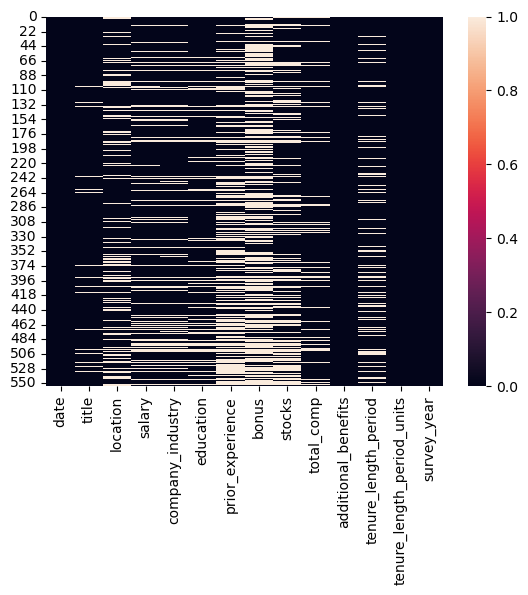

In [9]:
sns.heatmap(df.isna())

In [10]:
df = df.dropna(how="all", axis=1)
df

,date,title,location,salary,company_industry,education,prior_experience,bonus,stocks,total_comp,additional_benefits,tenure_length_period,tenure_length_period_units,survey_year
0,2020-12-28,Data Scientist,"Houston, TX, USA","140,000",Oil and Gas,Masters in Applied Statistics,2yrs of actuarial experience,NaN,15-30% bonus (no bonus this year of course du...,"140,000I'm about to accept a new job that will...",False,3.0,years,2020
1,2020-12-28,Program Analyst,NaN,86000,Federal Gov't (non defense,M.Ed,8 years at same agency in administrative posit...,Nope,NaN,NaN,False,1.0,years,2020
2,2020-12-28,Data Scientist,NaN,"85,000",Defense,Masters of Science in Data Science,"3 years as research assistant (statistics), 2 ...",NaN,"2,000","87,000",False,1.0,years,2020
3,2020-12-28,Senior Software Engineer (ML,NaN,240k,Fintech,B.S. Stats tier 2 school,"1 year in finance industry, 1.5 years in small...",60k,60k,360kMy last job I was a data scientist with 14...,False,6.0,months,2020
4,2020-12-28,Data Science Consultant,"London, UK","65,000",Large Tech Company,PhD,3 years as data science consultant for another...,NaN,incentive (3 year vest) - 23% annual bonus,"90,000 w/ bonus, stock &amp; benefits",False,2.0,years,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,2023-12-29,senior data scientist,NaN,AUD$130k,utilities,Phd in AI,system/database admin and data engineer,none,none,AUD$130k,False,5.0,years,2023
551,2023-12-29,Lead Data Scientist,United States,115K,Large Non-Tech Company,BS Economics/Stat &amp; MS Data Science,NaN,NaN,NaN,142K,False,6.0,months,2023
552,2023-12-29,Epic BI Developer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2.0,years,2023
553,2023-12-29,Sr Data Scientist,"Washington, DC, USA",150k,Finance,"PhD engineering, Masters in Analytics",2 yoe as a bench top scientists * **$Interns...,NaN,12k,162k,False,1.5,years,2023


In [11]:
df.duplicated().sum()

2

In [12]:
df = df.drop_duplicates()

In [13]:
df.additional_benefits.value_counts()

additional_benefits
False    548
True       5
Name: count, dtype: int64

In [14]:
df =df.drop('additional_benefits' ,axis=1)

In [15]:
df['salary'] = pd.to_numeric(df['salary'].str.replace('[^\d.]', '', regex=True), errors='coerce')
df['bonus'] = pd.to_numeric(df['bonus'].str.replace('[^\d.]', '', regex=True), errors='coerce')
df['stocks'] = pd.to_numeric(df['stocks'].str.replace('[^\d.]', '', regex=True), errors='coerce')
df['total_comp'] = pd.to_numeric(df['total_comp'].str.replace('[^\d.]', '', regex=True), errors='coerce')

In [16]:
df['title'].nunique()

245

In [17]:
mean_salary_by_title = df.groupby('title')['salary'].mean()

# Sorting the mean salaries in descending order and getting the top 10
top_mean_salaries = mean_salary_by_title.sort_values(ascending=False).head(10)

print(top_mean_salaries)

title
Principal data scientist* Tenure length: 2 months* Location: DFW* Salary: $160k* Company/Industry: Healthcare, R&amp;D* Education: PhD* Prior Experience: Finance, $140k base, $25k bonus (most years), 6 years* Stock and/or recurring bonuses: Non-profit performance dependent* Total comp: $160k - $180k* Draw: learning and research opportunity------* Title: Owner, data services consultancy    1.601403e+19
Data Scientist                                                                                                                                                                                                                                                                                                                                                                                          8.150586e+15
Economist/Senior Data Scientist                                                                                                                                                         

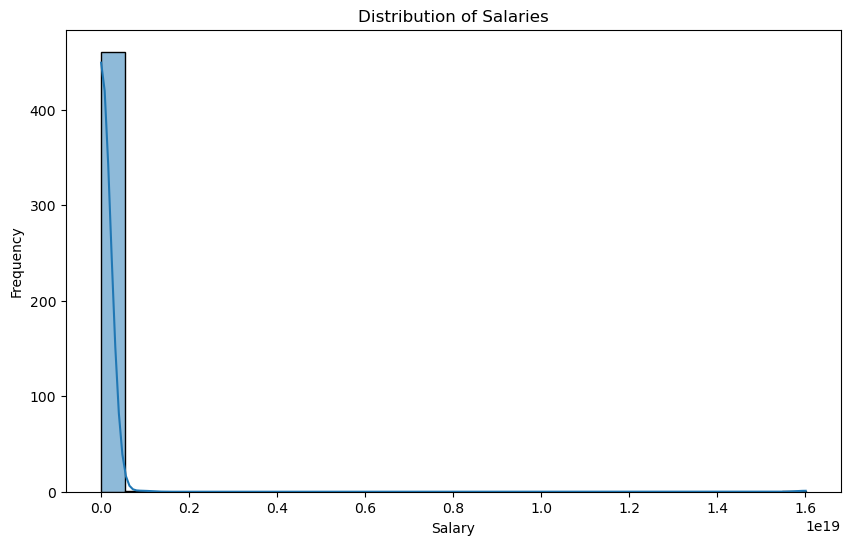

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['salary'].dropna(), bins=30, kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

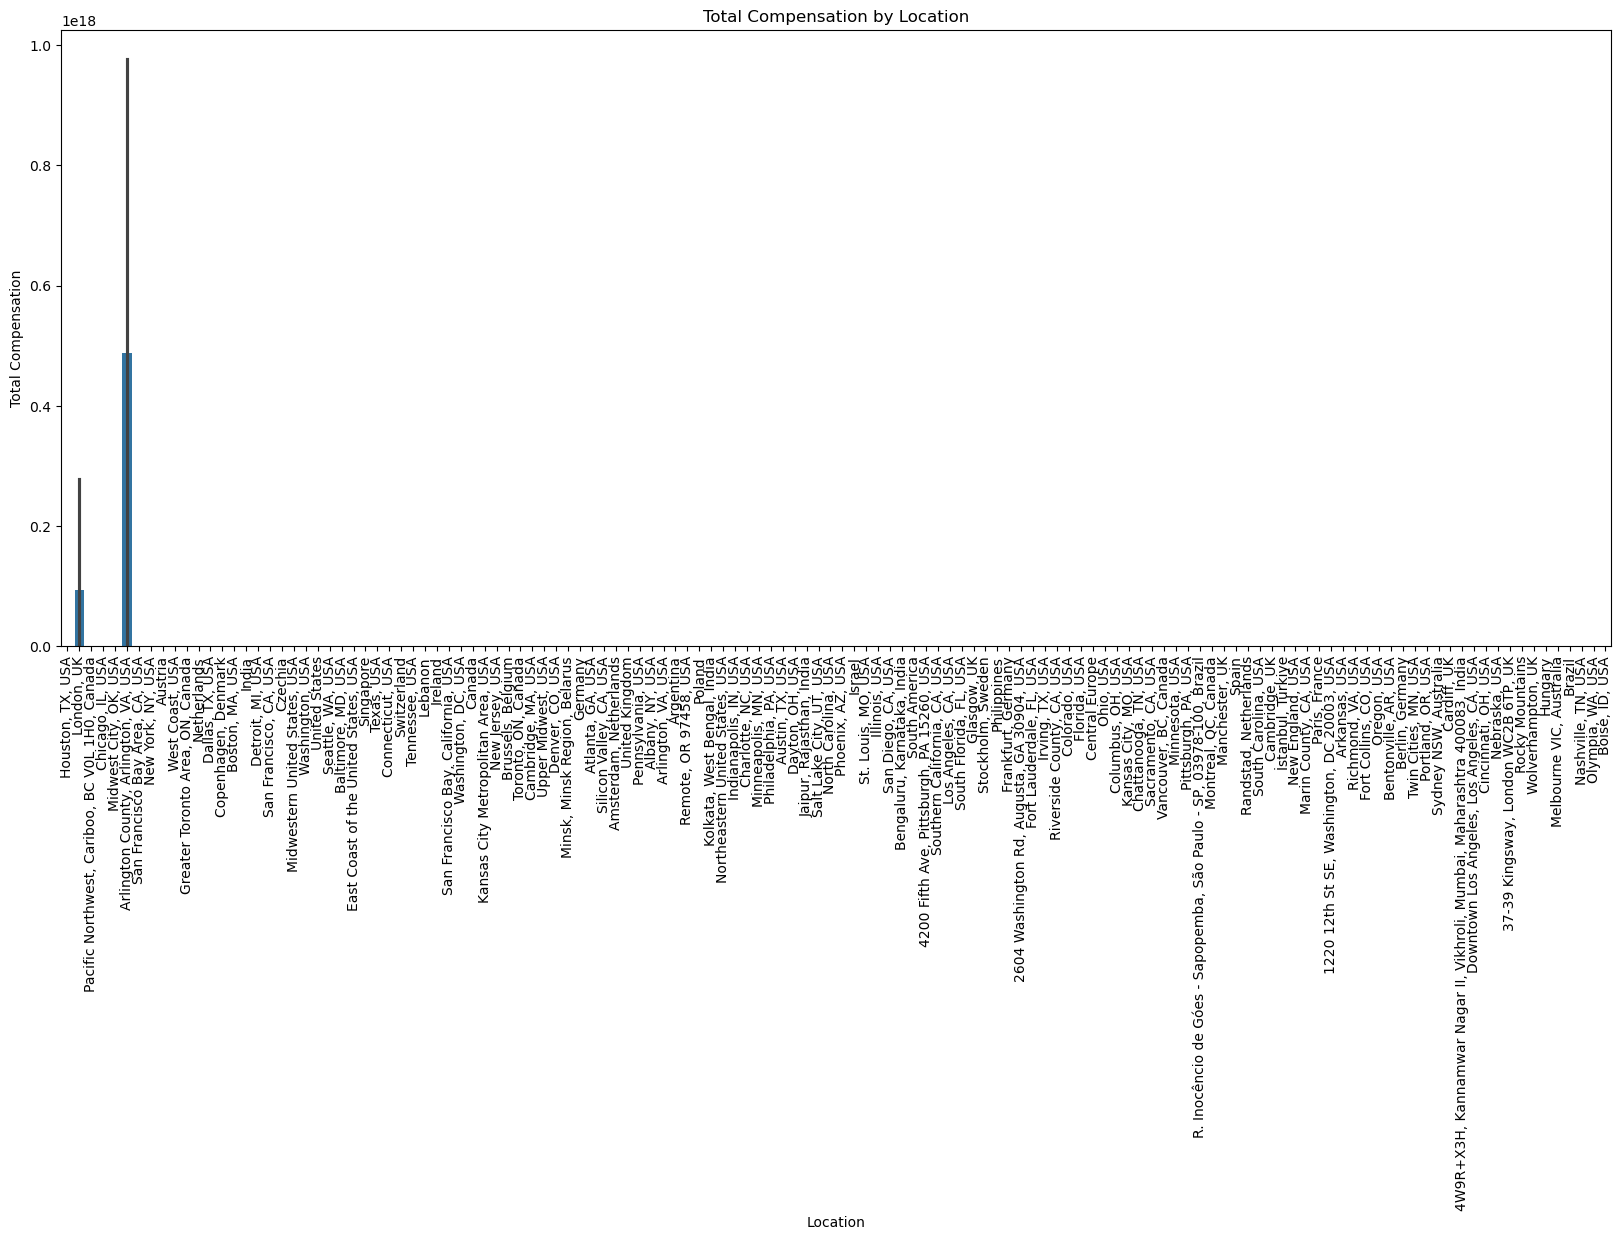

In [19]:
plt.figure(figsize=(20, 8))
sns.barplot(x='location', y='total_comp', data=df)
plt.title('Total Compensation by Location')
plt.xlabel('Location')
plt.ylabel('Total Compensation')
plt.xticks(rotation=90)
plt.show()

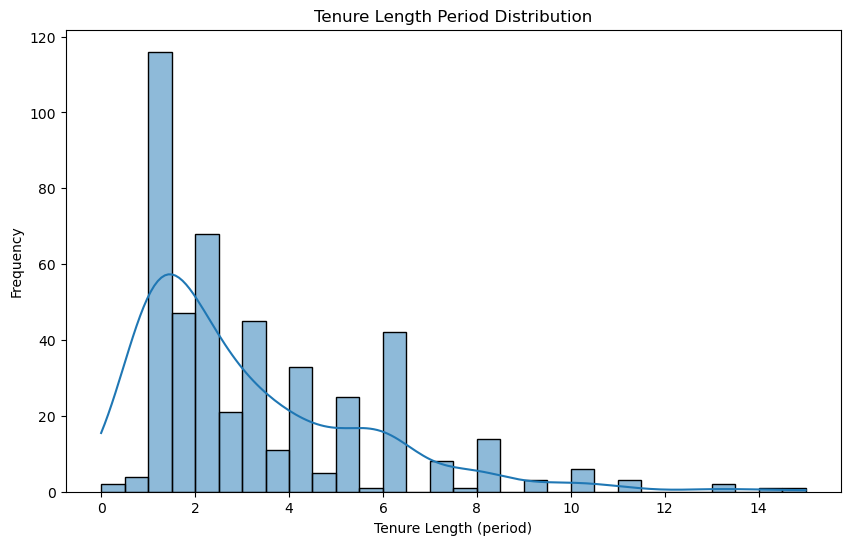

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['tenure_length_period'].dropna(), bins=30, kde=True)
plt.title('Tenure Length Period Distribution')
plt.xlabel('Tenure Length (period)')
plt.ylabel('Frequency')
plt.show()

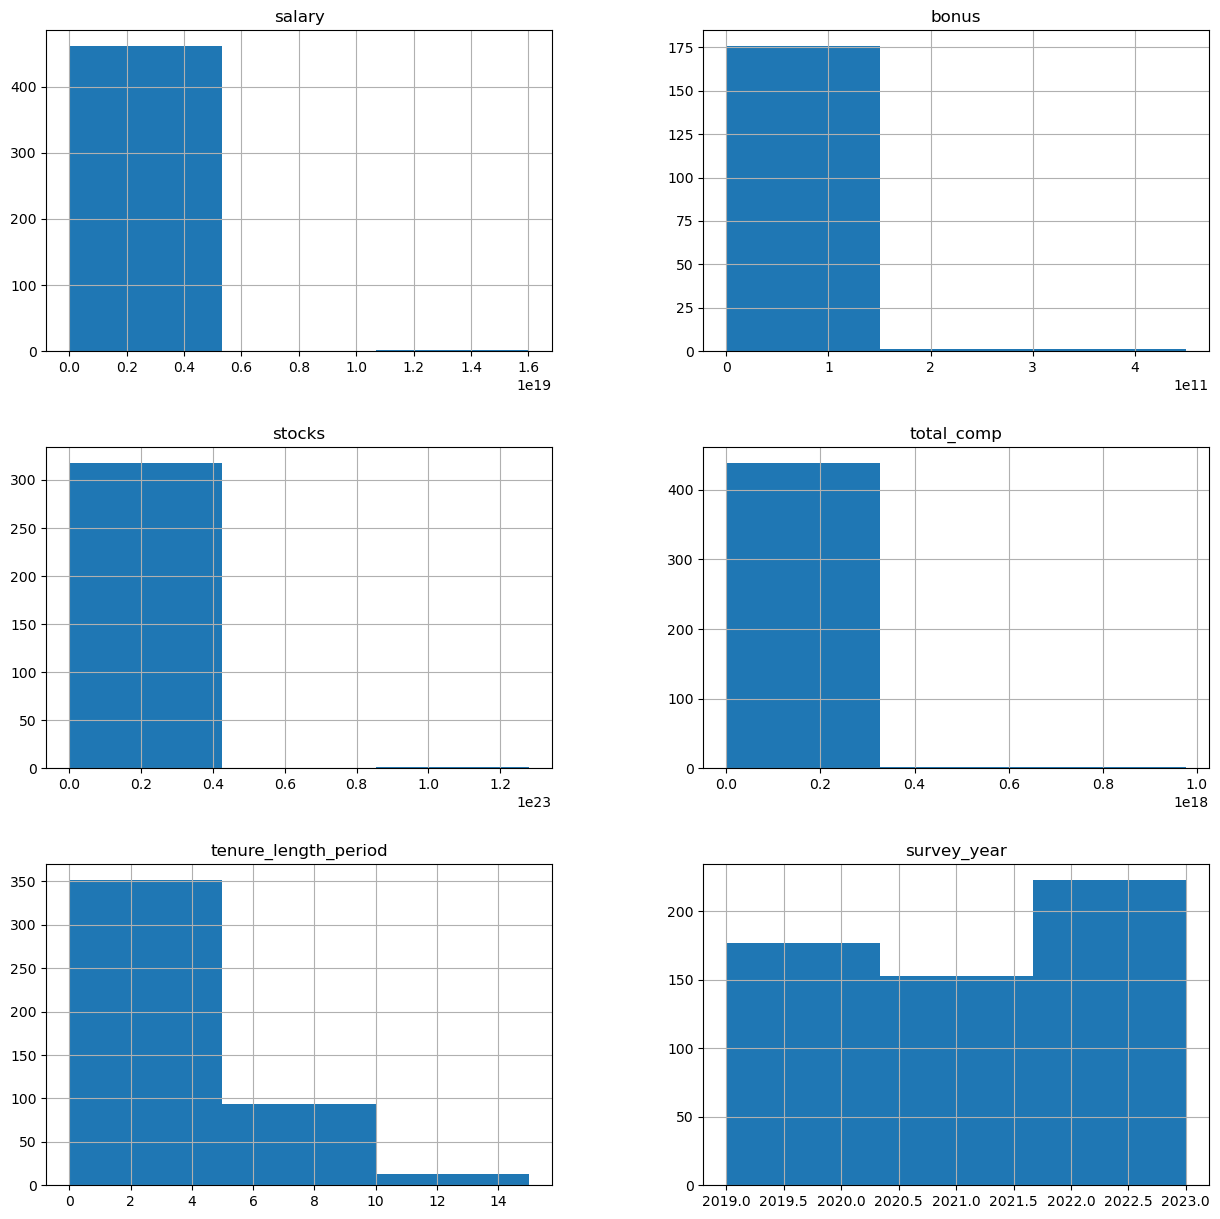

In [21]:
List = df.hist(bins=3, figsize = (15, 15))
plt.savefig("Hist.png")

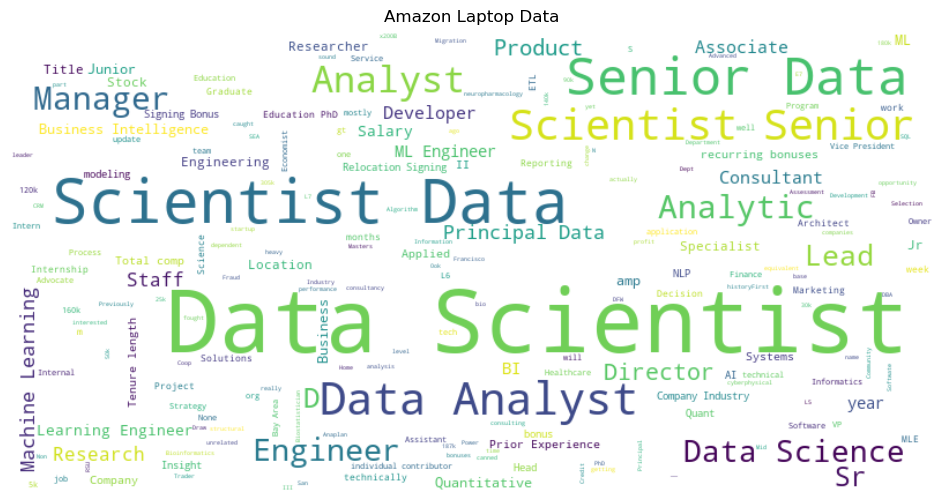

In [22]:
from wordcloud import WordCloud

reviews_text = ' '.join(df['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Amazon Laptop Data')
plt.axis('off')
plt.show()